In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
admit_predict = pd.read_csv('/Users/nisarkalaria/Desktop/Big_data_project/Admission_Predict_Ver1.1.csv')


In [5]:
print(admit_predict.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [3]:
admit_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [4]:
admit_predict.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
admit_predict.drop(columns=['Serial No.'],inplace=True)


In [35]:
Q1 = admit_predict.quantile(0.25)
Q3 = admit_predict.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
admit_predict = admit_predict[~((admit_predict < (Q1 - 1.5 * IQR)) |(admit_predict > (Q3 + 1.5 * IQR))).any(axis=1)]
admit_predict.shape

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


(497, 8)

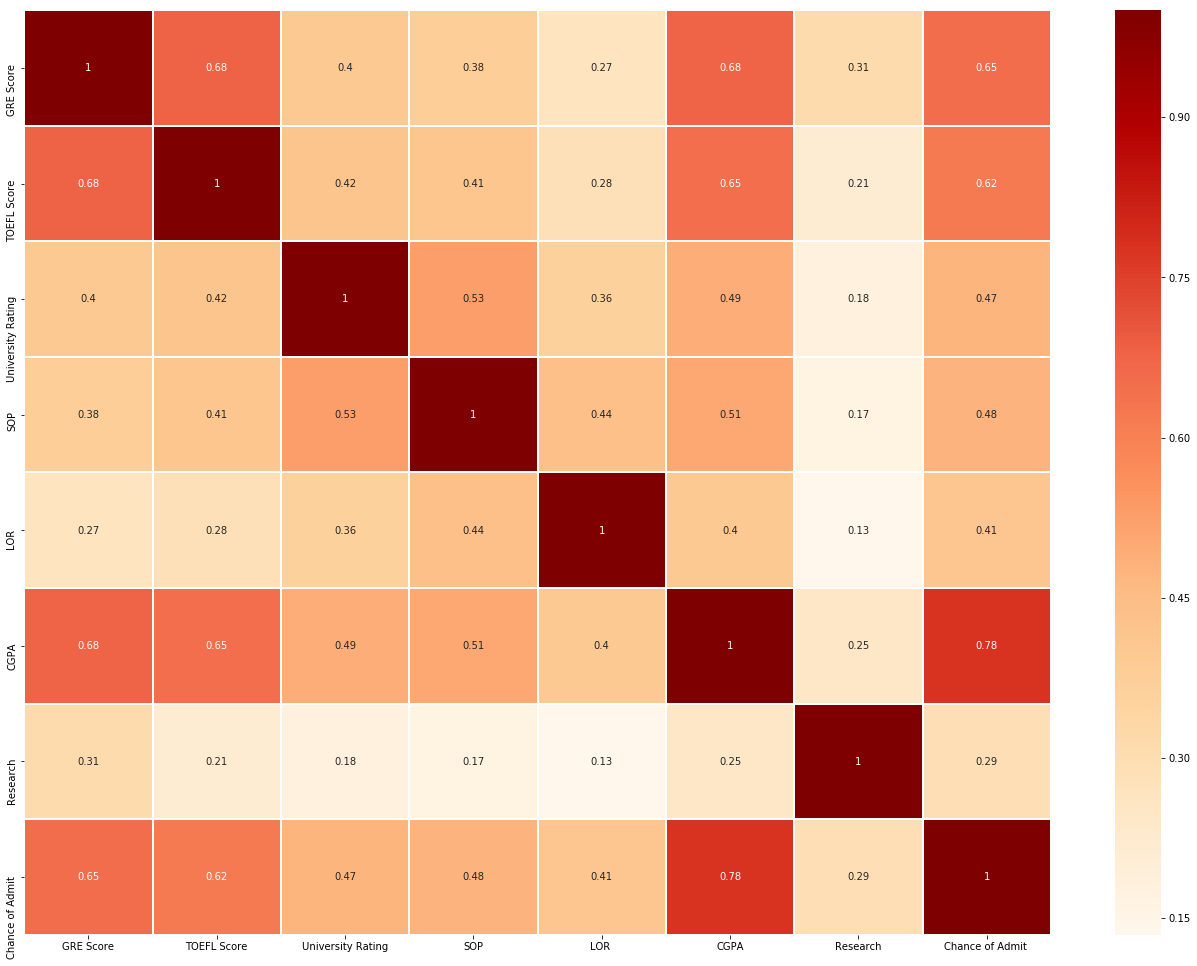

In [40]:
correlation = admit_predict[admit_predict.columns].corr()
sns.heatmap(correlation**2, linewidths=1, annot=True, cmap="OrRd");

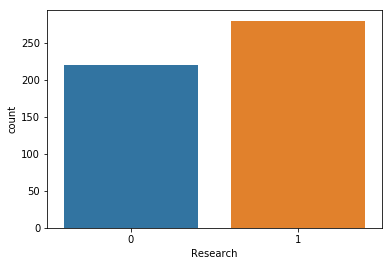

In [17]:
sns.countplot(x=admit_predict["Research"],data=admit_predict)

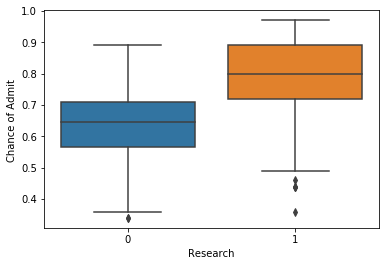

In [13]:
sns.boxplot(x="Research", y="Chance of Admit ", data=admit_predict)

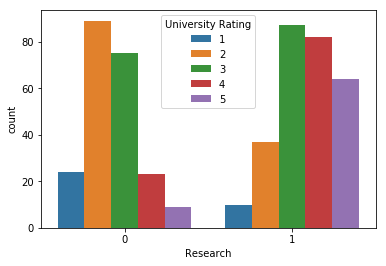

In [16]:
sns.countplot(x=admit_predict["Research"], hue=admit_predict["University Rating"], data=admit_predict)

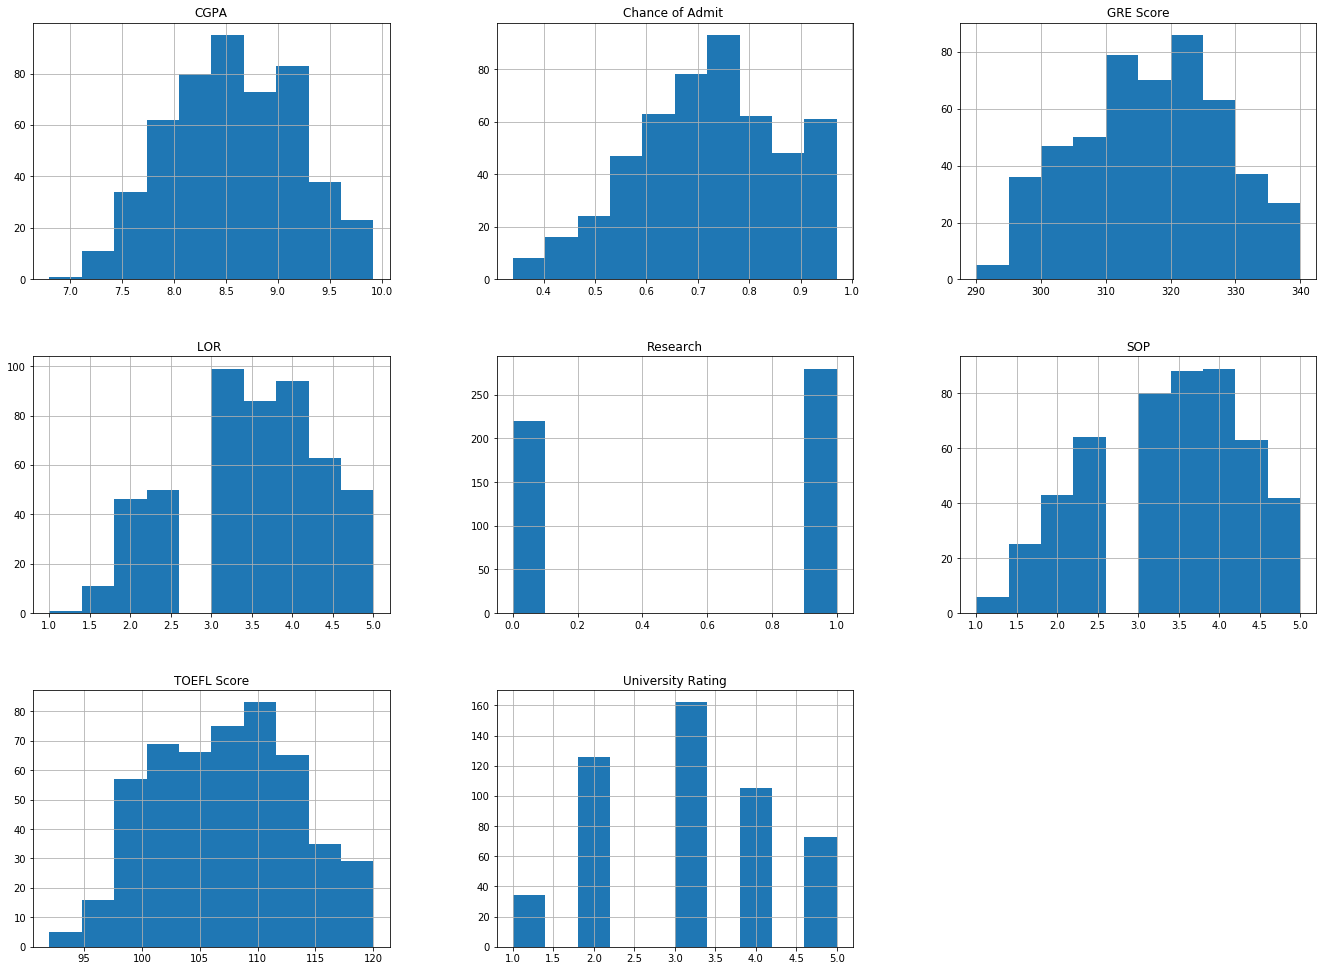

In [20]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 23
fig_size[1] = 17
plt.rcParams["figure.figsize"] = fig_size

admit_predict.hist()
plt.show()

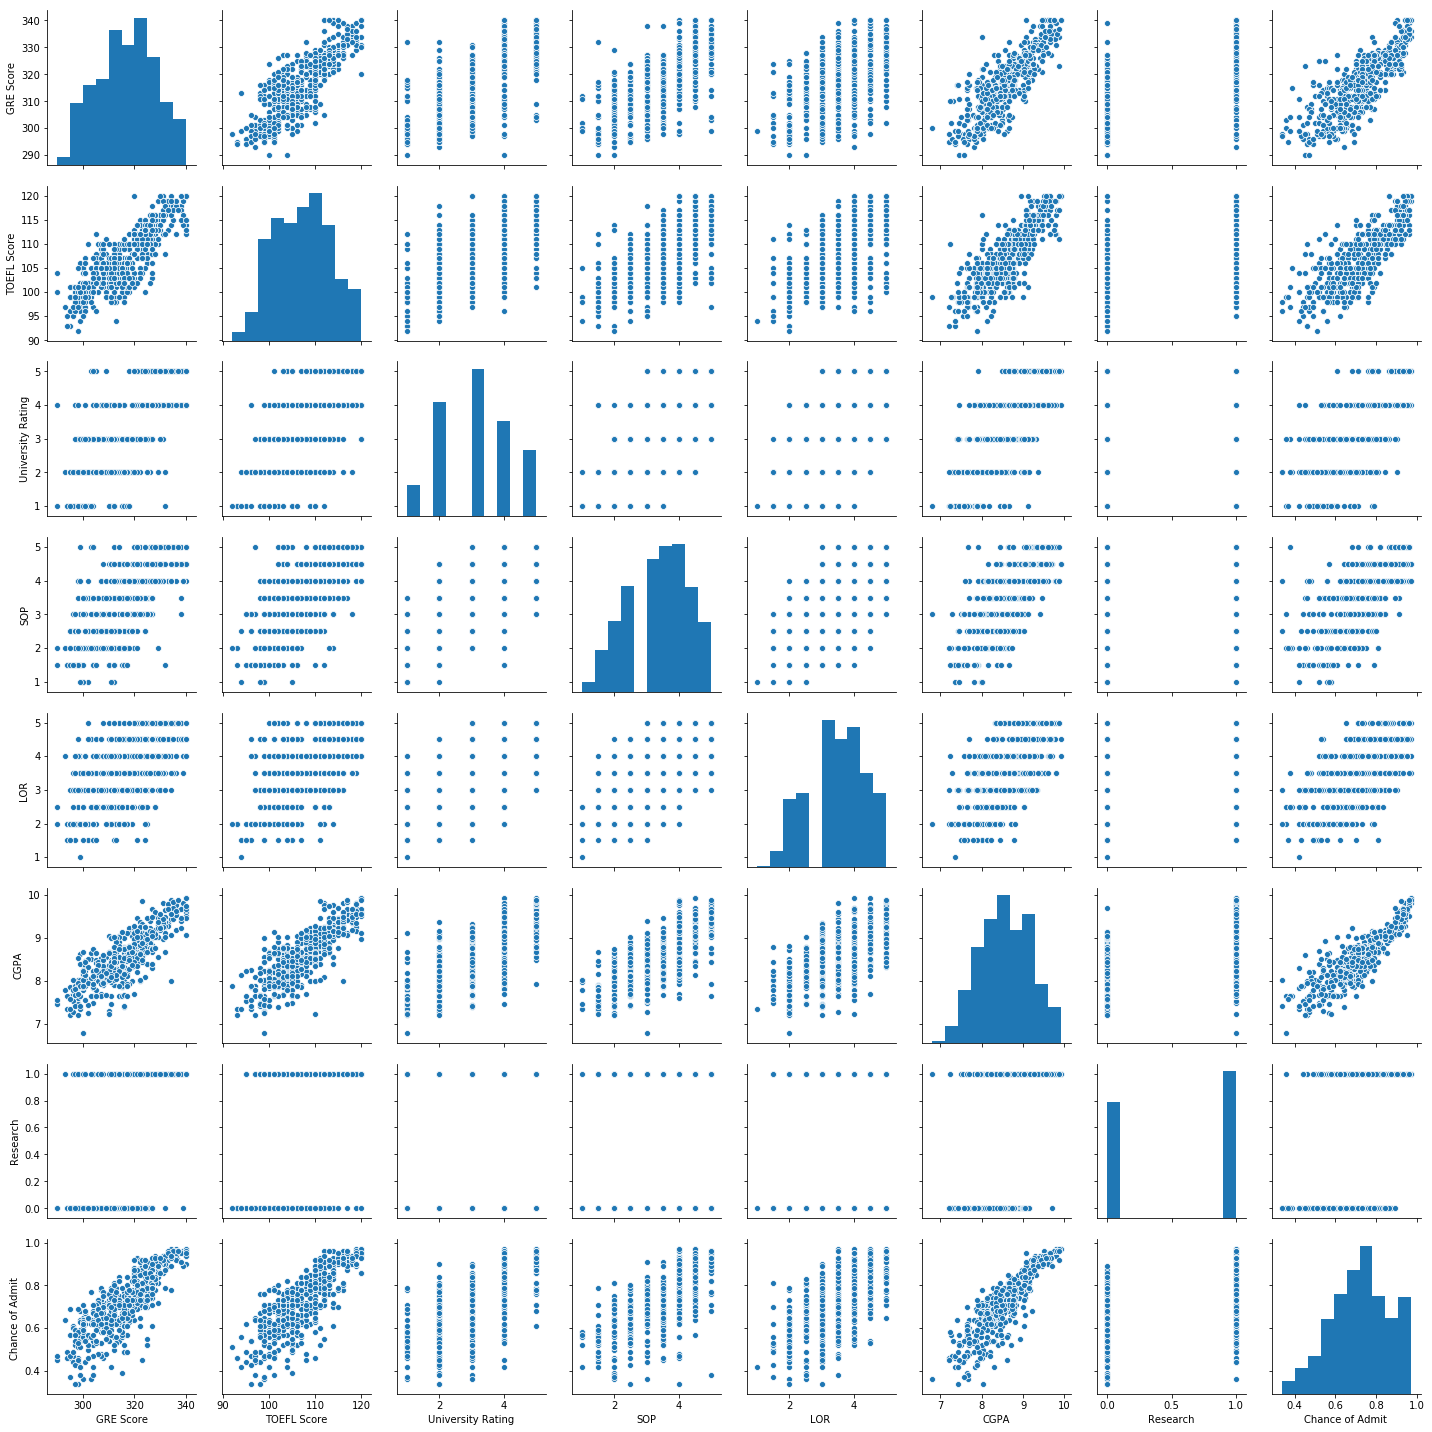

In [23]:
sns.pairplot(data=admit_predict)

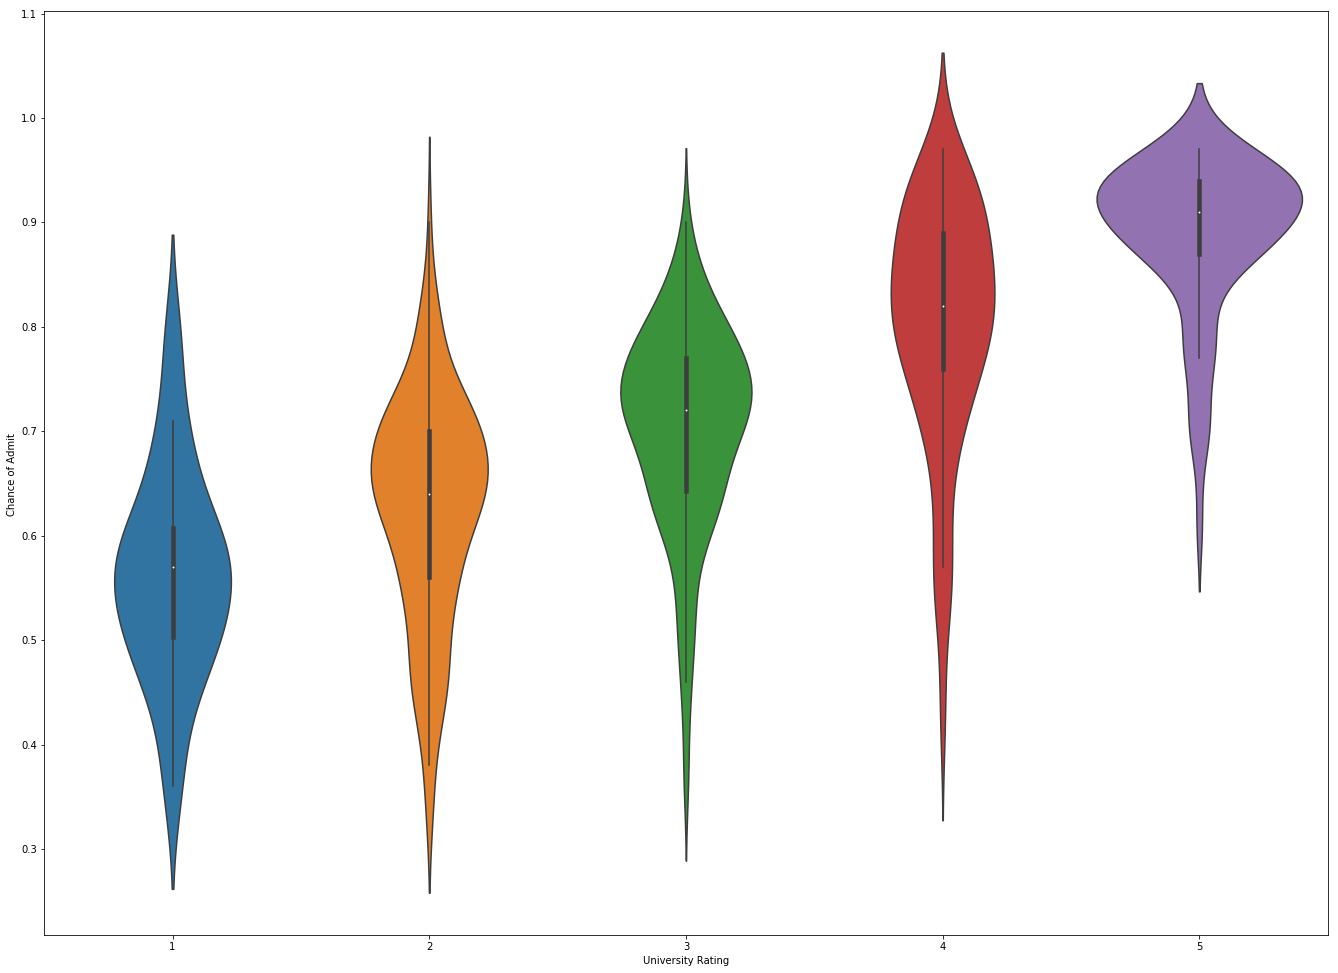

In [32]:
#sns.catplot(x="University Rating", y="Chance of Admit ",kind="violin", data=admit_predict)
sns.violinplot(x="University Rating", y="Chance of Admit ", data=admit_predict)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X=admit_predict.drop(["Chance of Admit "],axis=1)
y=admit_predict["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(pca.explained_variance_ratio_)

[0.66760763 0.11065843 0.08115388 0.05529897 0.04052305 0.02514628
 0.01961177]


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
